# Reuters

Date: 2023/08/16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import reuters
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

## Categories

In [2]:
categories = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

len(categories)

46

## Preperation

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
'len(train_data): {}, len(test_data): {}'.format(len(train_data), len(test_data))

'len(train_data): 8982, len(test_data): 2246'

In [5]:
'data: {}, label: {}'.format(train_data[0], train_labels[0])

'data: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12], label: 3'

In [6]:
'max number of index: {}'.format(max([max(sequence) for sequence in train_data]))

'max number of index: 9999'

In [7]:
word_index = reuters.get_word_index()

In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [9]:
reverse_word_index.get(1234)

'authorities'

In [10]:
reverse_word_index.get(111111, '?')

'?'

In [11]:
def decode_newswire(data):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in data])

decode_newswire(train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
y_train[0:10]

array([ 3.,  4.,  3.,  4.,  4.,  4.,  4.,  3.,  3., 16.], dtype=float32)

In [17]:
train_labels[0:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16], dtype=int64)

In [18]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Neural Network

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 59ms/step - loss: 2.8972 - accuracy: 0.4498 - val_loss: 1.9587 - val_accuracy: 0.5800
Epoch 2/20
16/16 [==============================] - 0s 32ms/step - loss: 1.6042 - accuracy: 0.6662 - val_loss: 1.3953 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 1.2025 - accuracy: 0.7339 - val_loss: 1.1930 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 0s 28ms/step - loss: 0.9792 - accuracy: 0.7884 - val_loss: 1.0790 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 34ms/step - loss: 0.8089 - accuracy: 0.8276 - val_loss: 1.0388 - val_accuracy: 0.7680
Epoch 6/20
16/16 [==============================] - 1s 31ms/step - loss: 0.6768 - accuracy: 0.8579 - val_loss: 0.9685 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.5680 - accuracy: 0.8800 - val_loss: 0.9215 - val_accuracy: 0.8000
Epoch 8/20
16

## Results -- overfitting

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

Text(0, 0.5, 'Loss')

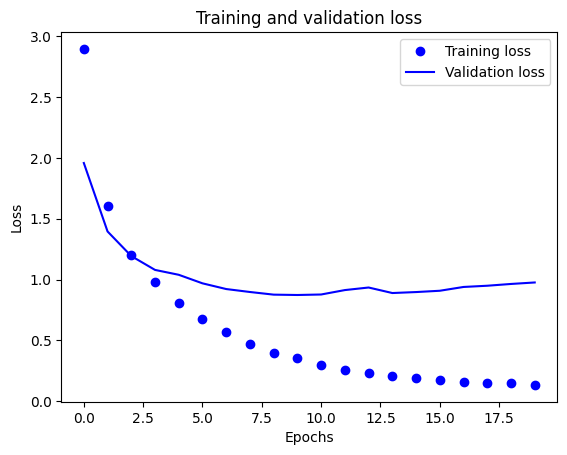

In [25]:
fig, ax = plt.subplots()
ax.plot(loss_values, 'bo', label='Training loss')
ax.plot(val_loss_values, 'b', label='Validation loss')
ax.legend()
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [26]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

Text(0, 0.5, 'Accuracy')

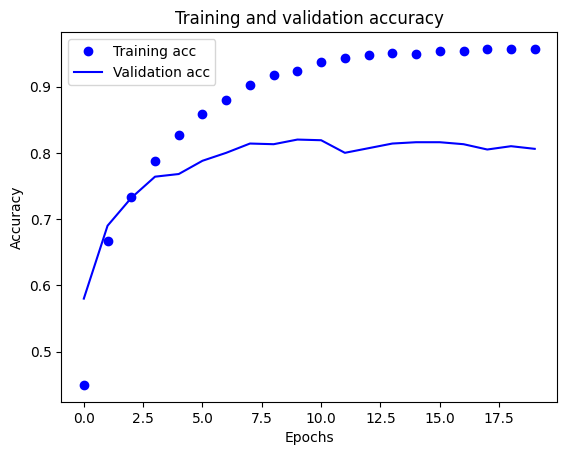

In [27]:
fig, ax = plt.subplots()
ax.plot(acc, 'bo', label='Training acc')
ax.plot(val_acc, 'b', label='Validation acc')
ax.legend()
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

## Training 2

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,  # 20 -> 8
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 2s 60ms/step - loss: 0.4866 - accuracy: 0.1635 - val_loss: 0.2518 - val_accuracy: 0.1700
Epoch 2/8
16/16 [==============================] - 1s 35ms/step - loss: 0.1694 - accuracy: 0.3587 - val_loss: 0.1173 - val_accuracy: 0.4950
Epoch 3/8
16/16 [==============================] - 1s 35ms/step - loss: 0.0999 - accuracy: 0.4686 - val_loss: 0.0883 - val_accuracy: 0.5000
Epoch 4/8
16/16 [==============================] - 1s 37ms/step - loss: 0.0805 - accuracy: 0.5084 - val_loss: 0.0754 - val_accuracy: 0.4990
Epoch 5/8
16/16 [==============================] - 1s 36ms/step - loss: 0.0705 - accuracy: 0.5223 - val_loss: 0.0671 - val_accuracy: 0.5310
Epoch 6/8
16/16 [==============================] - 1s 35ms/step - loss: 0.0639 - accuracy: 0.5301 - val_loss: 0.0616 - val_accuracy: 0.5410
Epoch 7/8
16/16 [==============================] - 1s 35ms/step - loss: 0.0594 - accuracy: 0.5481 - val_loss: 0.0576 - val_accuracy: 0.5590
Epoch 8/8
16/16 [===

In [31]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.5828


[0.05573685094714165, 0.5828139185905457]

## Results 2

In [32]:
history_dict = history.history

In [33]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

Text(0, 0.5, 'Loss')

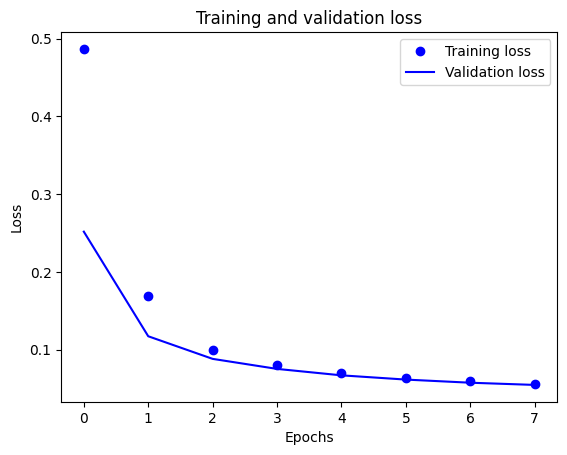

In [34]:
fig, ax = plt.subplots()
ax.plot(loss_values, 'bo', label='Training loss')
ax.plot(val_loss_values, 'b', label='Validation loss')
ax.legend()
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [35]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

Text(0, 0.5, 'Accuracy')

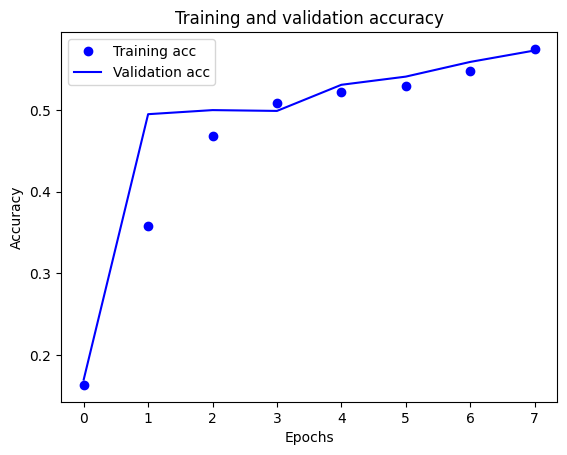

In [36]:
fig, ax = plt.subplots()
ax.plot(acc, 'bo', label='Training acc')
ax.plot(val_acc, 'b', label='Validation acc')
ax.legend()
ax.set_title('Training and validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

In [37]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.5828


[0.05573685094714165, 0.5828139185905457]

## Prediction

In [38]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [39]:
IDX = 15
prediction = np.round(predictions[IDX]*100).astype('uint8')
prediction

array([0, 1, 0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

In [40]:
categories[np.argmax(prediction)]

'acq'

In [41]:
decode_newswire(test_data[IDX])

"? leading domestic semiconductor makers will boost imports and cut production of key memory microchips from next month in line with government attempts to ward off u s trade sanctions company spokesmen said the moves might persuade the u s to call off the sanctions despite obstacles to full implementation of the plans analysts said the tariffs will affect about 300 mln dlrs worth of products and are in retaliation for japan's alleged failure to honour a semiconductor trade pact in announcing the sanctions last friday president reagan said japan had not fulfilled its promise to halt predatory pricing and open japan's market to foreign products but u s trade representative clayton yeutter said yesterday on u s television that the u s is willing to drop the tariffs if japan shows a clear indication that it will open its markets to u s goods the ministry of international trade and industry miti has urged producers to slash output of the chips by 11 pct in the second quarter following a ca